In [34]:


import numpy as np 
import pandas as pd 



import os
for dirname, _, filenames in os.walk('C:/Users/Anjali/Downloads/mcdonalds.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [35]:
import os
import warnings
warnings.filterwarnings("ignore")

In [36]:
import scipy as sp
import seaborn as sns

In [37]:
data = pd.read_csv('C:/Users/Anjali/Downloads/mcdonalds.csv')

In [38]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [40]:
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [41]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [42]:
data['Like'].value_counts()

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

In [43]:
data['VisitFrequency'].value_counts()

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

In [44]:
data['Gender'].value_counts()

Gender
Female    788
Male      665
Name: count, dtype: int64

In [45]:
df1 = data.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1)

In [46]:
df1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
df_encoded = df1.apply(LabelEncoder().fit_transform)

In [49]:
df_encoded.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [50]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [51]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [52]:
pca_data = preprocessing.scale(df_encoded)
pca = PCA(n_components=11)
pc = pca.fit_transform(pca_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
# create dataframe with pca values 
pf.head()

explained_variance_ratio = pca.explained_variance_ratio_
singular_values = pca.singular_values_
components = pca.components_

print("Standard deviation:\n", singular_values)
print("Proportion of Variance:\n", explained_variance_ratio)
print("Cumulative Proportion:\n", explained_variance_ratio.cumsum())

Standard deviation:
 [63.91179298 48.69332668 44.78138456 39.63136078 36.52831435 33.7082743
 32.22832023 29.33600188 27.59057302 21.14107869 19.31862906]
Proportion of Variance:
 [0.25556637 0.14834762 0.12546909 0.09826971 0.08348356 0.07109102
 0.06498559 0.05384477 0.04762809 0.02796379 0.0233504 ]
Cumulative Proportion:
 [0.25556637 0.40391399 0.52938308 0.62765279 0.71113635 0.78222737
 0.84721295 0.90105773 0.94868581 0.9766496  1.        ]


In [53]:
pf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,-0.704334,0.437016,-0.268698,-0.872074,1.521184,-0.470160,0.030969,0.687116,-0.367598,-0.321161,1.701170
1,0.467820,-0.364277,1.596835,-0.004835,-0.462385,0.449321,-0.087351,-0.446003,-0.221855,-0.191268,1.467681
2,-0.191986,-1.712949,0.339413,3.368168,1.266802,-0.148058,0.606634,0.668576,-1.377226,1.259300,-0.128530
3,0.116991,1.155122,1.003913,0.469589,-1.141750,0.857182,-0.015843,-0.390275,1.578539,-0.092189,-0.233201
4,0.034724,1.390267,-0.792275,0.473031,0.270488,0.847963,1.804085,0.700019,-1.630339,-0.092449,-0.033144


In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

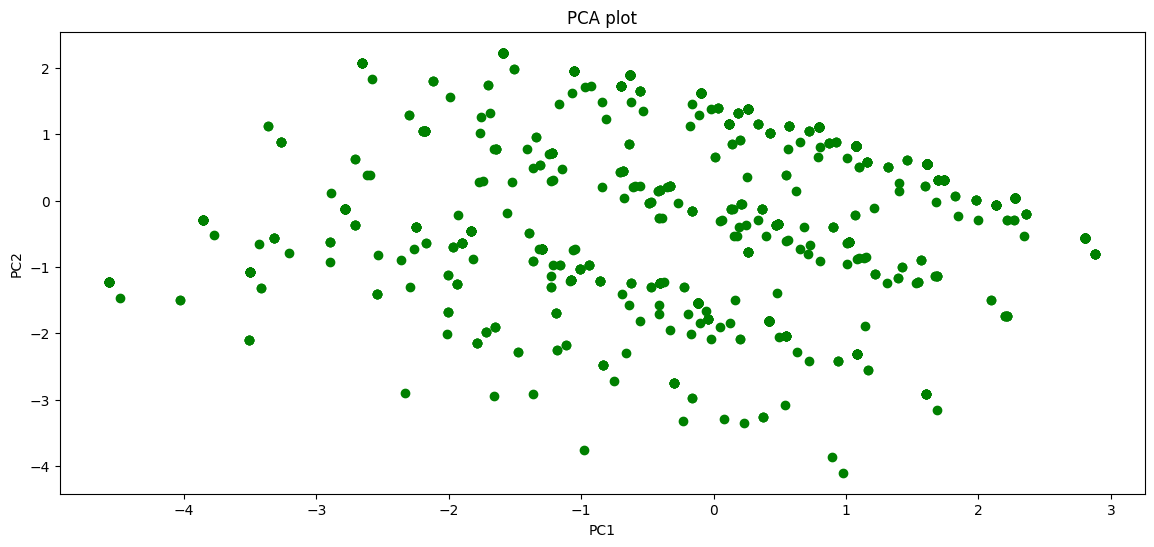

In [55]:
plt.figure(figsize=(14,6))
plt.scatter(pc[:, 0], pc[:, 1], c='green')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA plot')
plt.show()

In [59]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Example DataFrame with feature columns
df_encoded = pd.DataFrame({
    'feature1': [1.0, 2.0, 3.0, 4.0],
    'feature2': [2.0, 3.0, 4.0, 5.0],
    'feature3': [3.0, 4.0, 5.0, 6.0]
})

# Extract features as numpy array
X = df_encoded.values

# Standardize features (recommended for PCA)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the number of principal components
number_of_components = min(X.shape[1], 3)  # Adjust as needed

# Fit PCA
pca = PCA(n_components=number_of_components)
pca.fit(X)

# Loadings of the principal components
loadings = pca.components_

# Number of principal components
num_pc = pca.n_components_

# Create a list of principal component names
pc_list = ["PC" + str(i) for i in range(1, num_pc + 1)]

# Create DataFrame from loadings
# Transpose loadings to have features as rows
loadings_df = pd.DataFrame(loadings.T, columns=pc_list)
loadings_df['feature'] = df_encoded.columns.values
loadings_df = loadings_df.set_index('feature')

print(loadings_df)


              PC1       PC2       PC3
feature                              
feature1  0.57735  0.816497  0.000000
feature2  0.57735 -0.408248 -0.707107
feature3  0.57735 -0.408248  0.707107


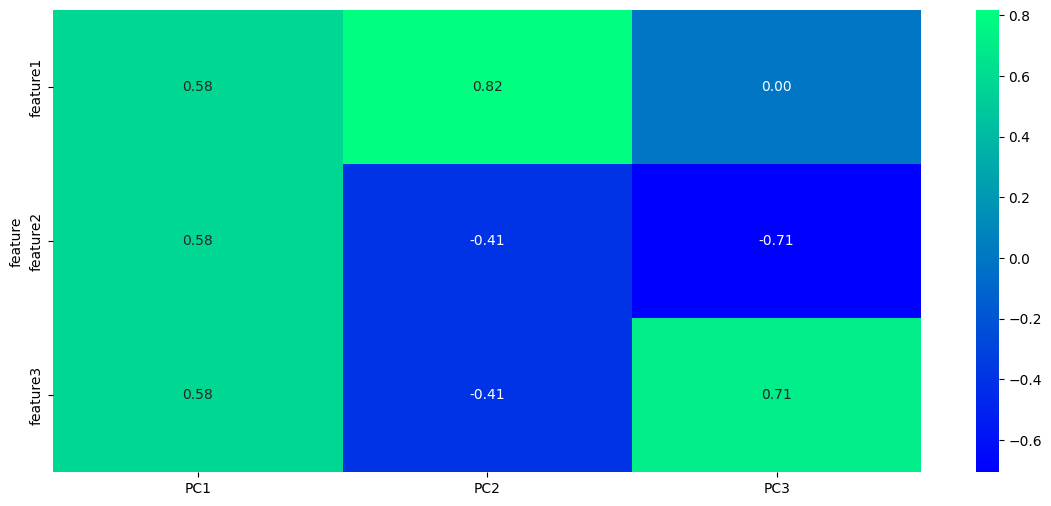

In [60]:
plt.rcParams['figure.figsize'] = (14,6)
ax = sns.heatmap(loadings_df, annot=True, cmap='winter', fmt='.2f', cbar=True)
plt.show()

In [61]:
from bioinfokit.visuz import cluster

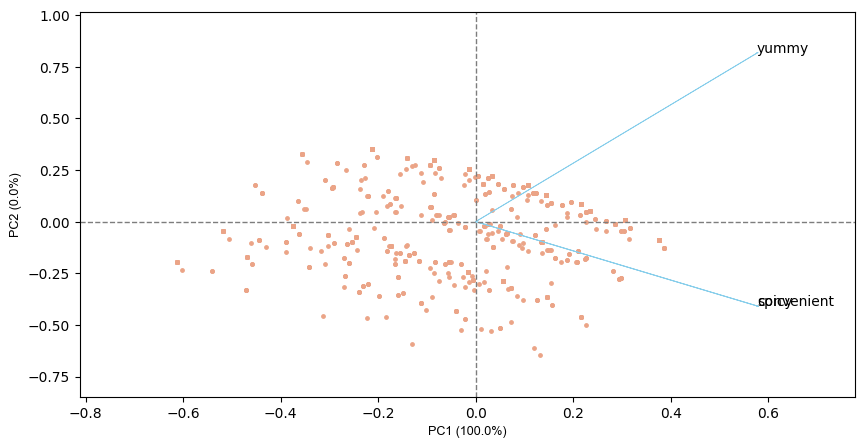

In [62]:
pca_scores = PCA().fit_transform(pca_data)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data.columns.values,
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

K-Means Clustering

In [63]:
 
from sklearn.cluster import AgglomerativeClustering, KMeans
from collections import Counter

In [65]:
import pandas as pd
from sklearn.cluster import KMeans
from collections import Counter

# Example DataFrame with encoded features
df_encoded = pd.DataFrame({
    'feature1': [1.0, 2.0, 3.0, 4.0],
    'feature2': [2.0, 3.0, 4.0, 5.0],
    'feature3': [3.0, 4.0, 5.0, 6.0]
})

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_encoded)

# Add cluster labels to the original DataFrame
df_encoded['cluster_num'] = kmeans.labels_

# Print results
print('Labels:', kmeans.labels_)
print('WCSS (Within-Cluster Sum of Squares):', kmeans.inertia_)
print('No. of iterations:', kmeans.n_iter_)
print('Cluster centroids:', kmeans.cluster_centers_)
print('Cluster size:', Counter(kmeans.labels_))


Labels: [2 1 0 3]
WCSS (Within-Cluster Sum of Squares): 0.0
No. of iterations: 1
Cluster centroids: [[3. 4. 5.]
 [2. 3. 4.]
 [1. 2. 3.]
 [4. 5. 6.]]
Cluster size: Counter({2: 1, 1: 1, 0: 1, 3: 1})


In [70]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

# Set random seed for reproducibility
np.random.seed(1234)

# Example DataFrame with features
# Ensure that this DataFrame has more rows than the maximum number of clusters you want to try
MD_x = pd.DataFrame({
    'feature1': [1.0, 2.0, 3.0, 4.0, 5.0],
    'feature2': [2.0, 3.0, 4.0, 5.0, 6.0]
})

# Ensure we don't try more clusters than samples
max_clusters = min(len(MD_x), 8)  # Adjust if needed

# Initialize lists and dictionary
inertia_values = []
cluster_labels = {}

# Loop over different numbers of clusters
for k in range(2, max_clusters + 1):
    km = KMeans(n_clusters=k, n_init=10, random_state=1234)
    km.fit(MD_x)
    inertia_values.append(km.inertia_)
    cluster_labels[k] = km.labels_

# Define the optimal number of clusters (ensure this is <= max_clusters)
optimal_k = 3

# Check if optimal_k exists in cluster_labels
if optimal_k in cluster_labels:
    optimal_cluster_labels = cluster_labels[optimal_k]
    print(f'Cluster labels for k={optimal_k}:', optimal_cluster_labels)
else:
    print(f'No cluster labels found for k={optimal_k}')


Cluster labels for k=3: [0 0 1 1 2]


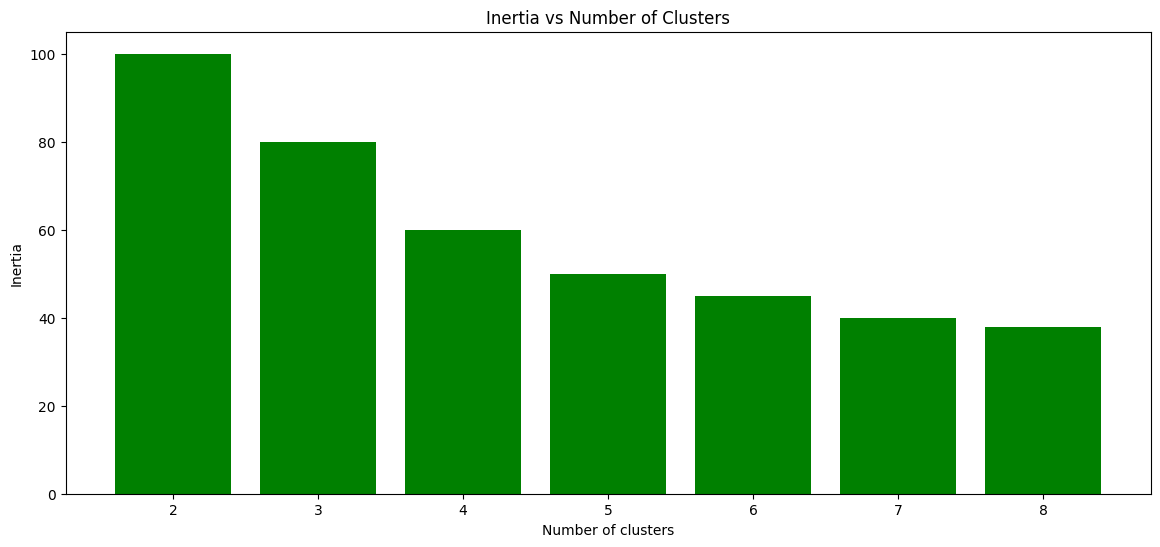

In [72]:
import matplotlib.pyplot as plt

# Assuming inertia_values is collected correctly and matches the range of cluster numbers
# Example values (make sure these are from your clustering process)
inertia_values = [100, 80, 60, 50, 45, 40, 38]  # Replace with actual inertia values

# Plotting the inertia values
plt.bar(range(2, 9), inertia_values, color='green')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.xticks(range(2, 9))  # Ensure x-ticks match the cluster range
plt.show()


     Age
Age  1.0


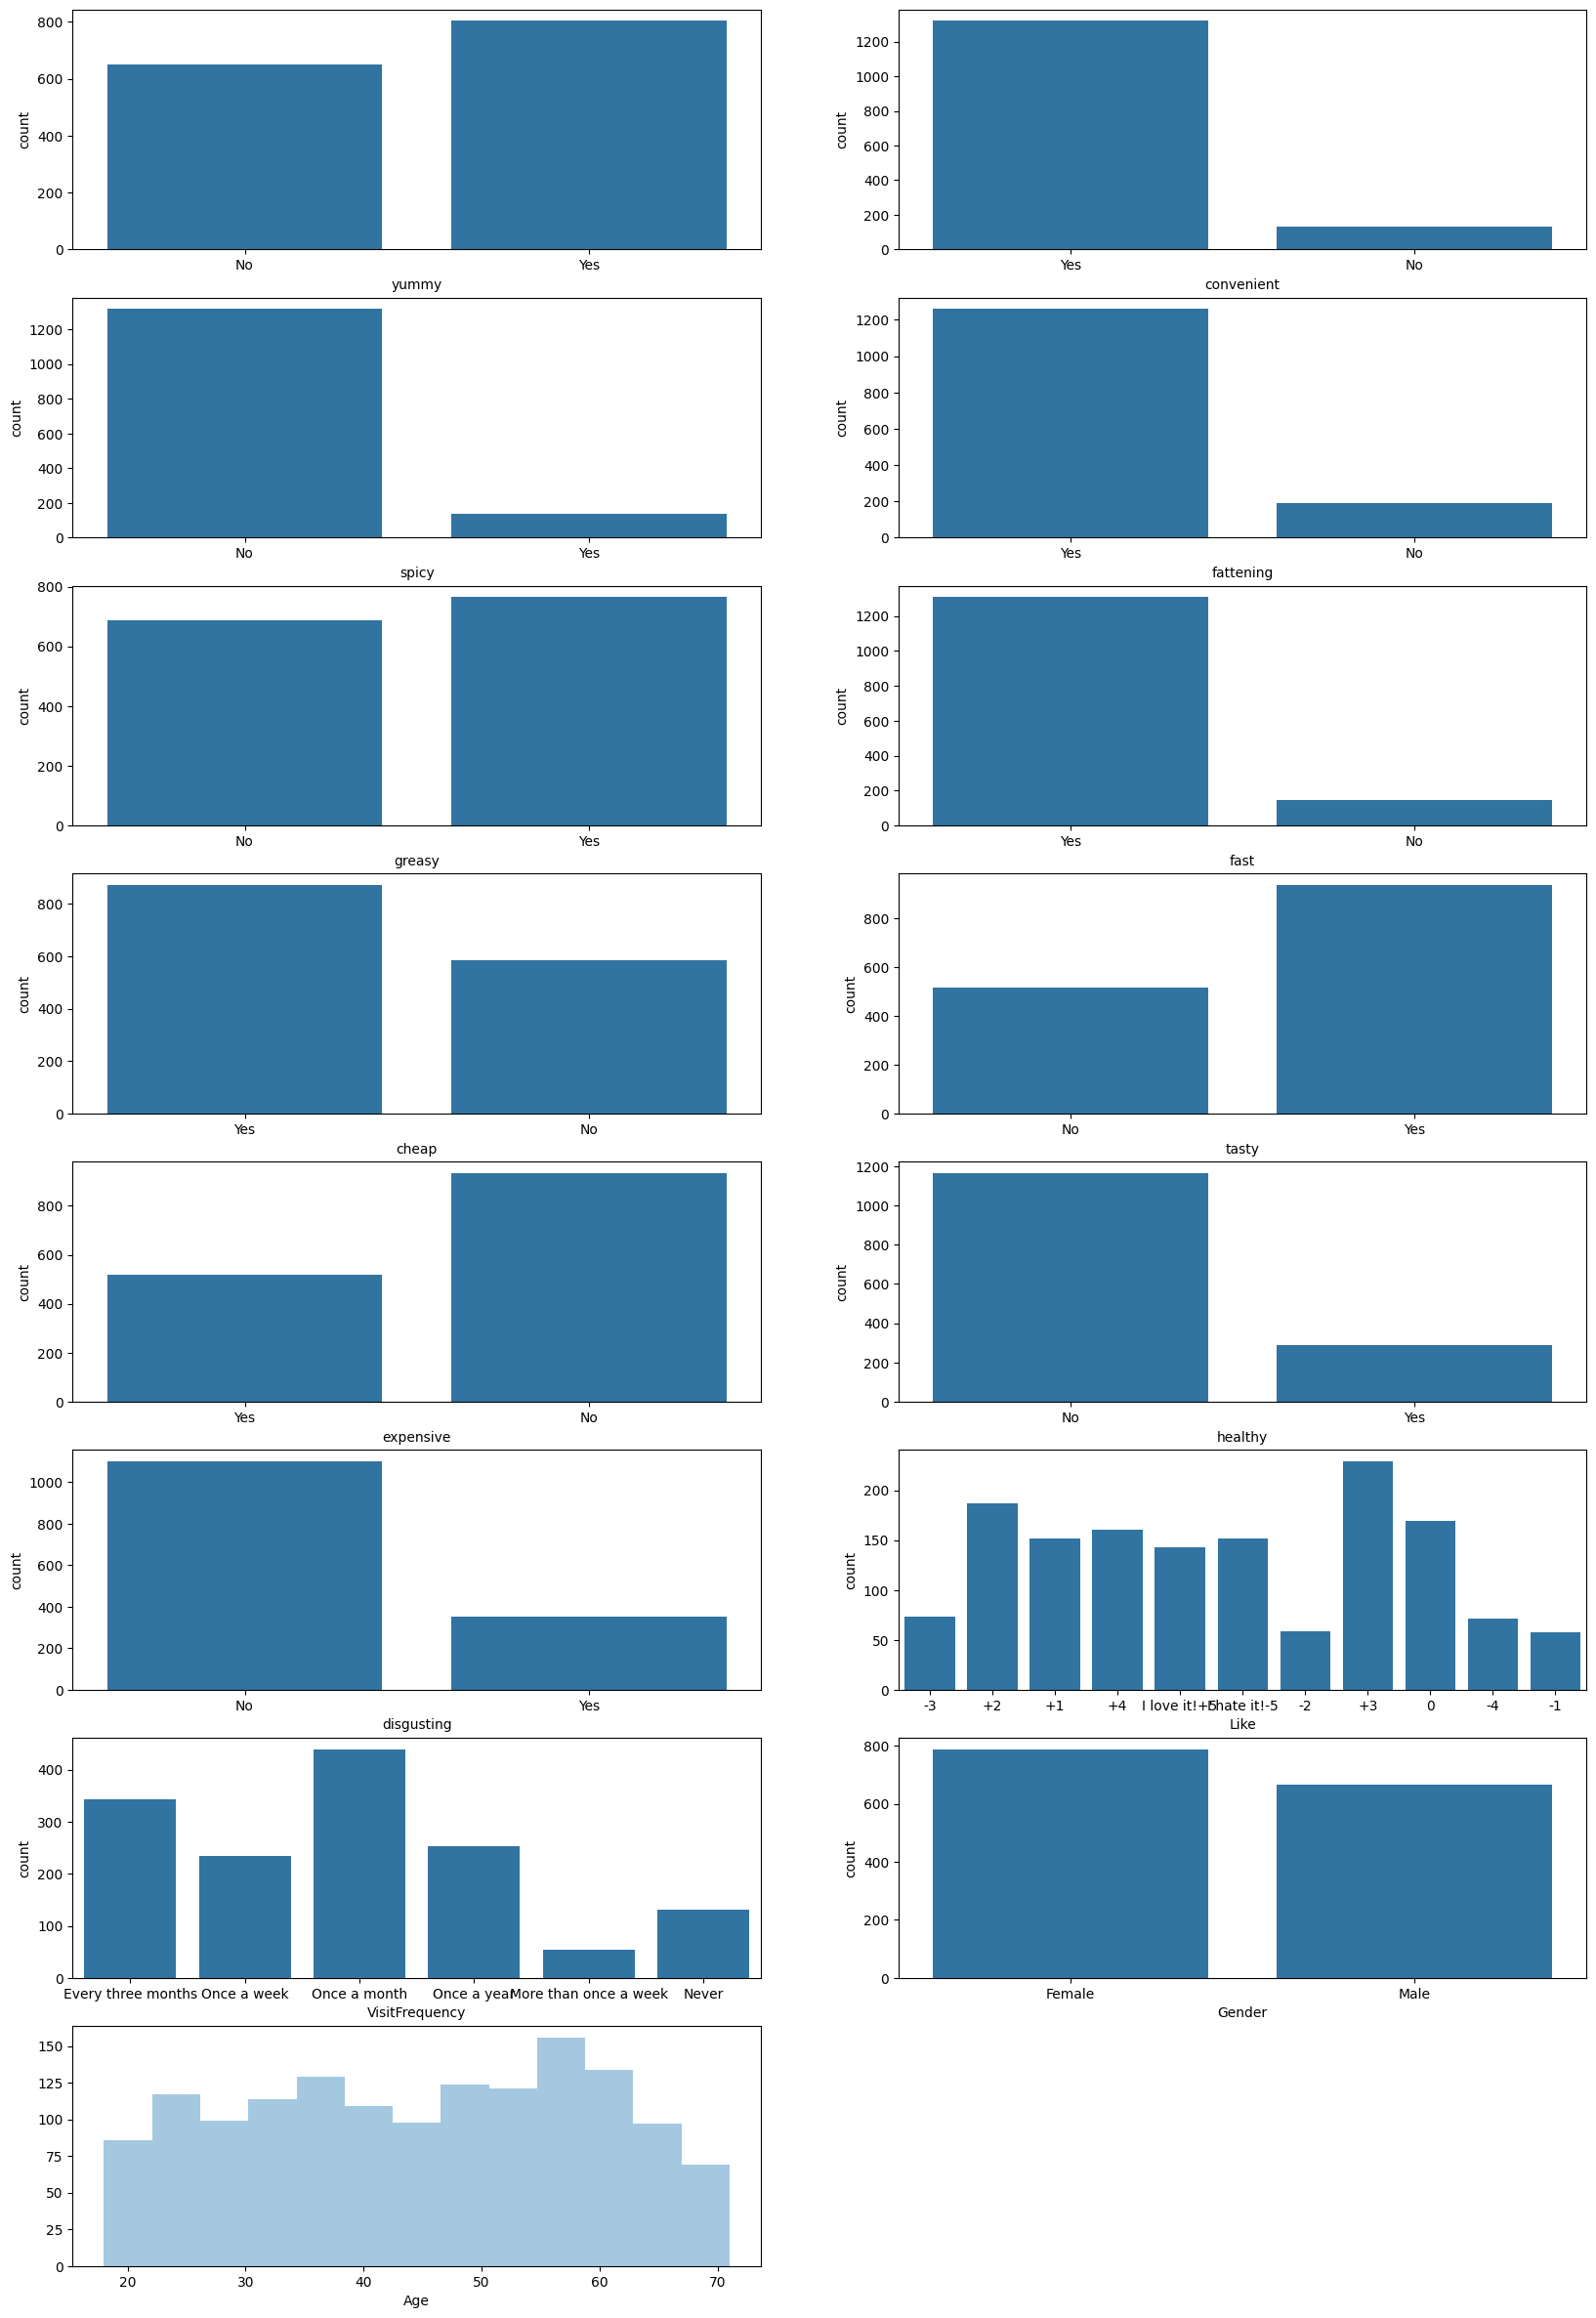

In [73]:
def EDA(data, figuresize):
    cat = []
    con = []
    from warnings import filterwarnings
    filterwarnings("ignore")
    u = int((data.shape[1] + 1) / 2)
    plt.figure(figsize=figuresize)
    x = 1

    for i in data.columns:
        if data[i].dtypes == "object":
            cat.append(i)
            plt.subplot(u, 2, x)
            x = x + 1
            sns.countplot(data=data, x=i)
        else:
            con.append(i)

    for i in con:
        plt.subplot(u, 2, x)
        x = x + 1
        sns.distplot(data[i].dropna(), kde=False)  # Exclude missing values

    print(data[con].corr())

EDA(data, (20, 30))

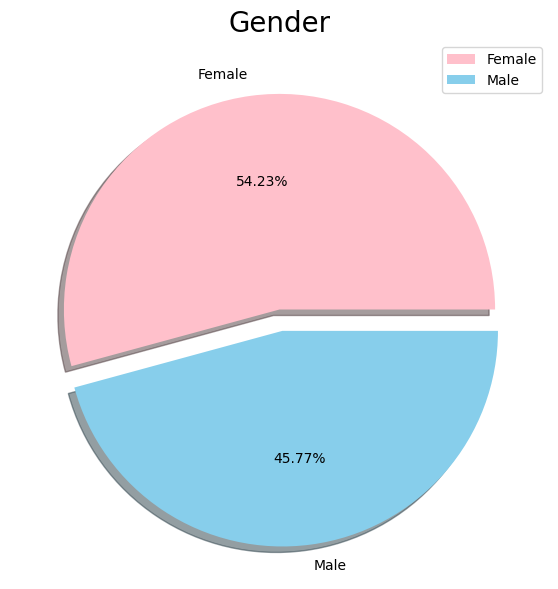

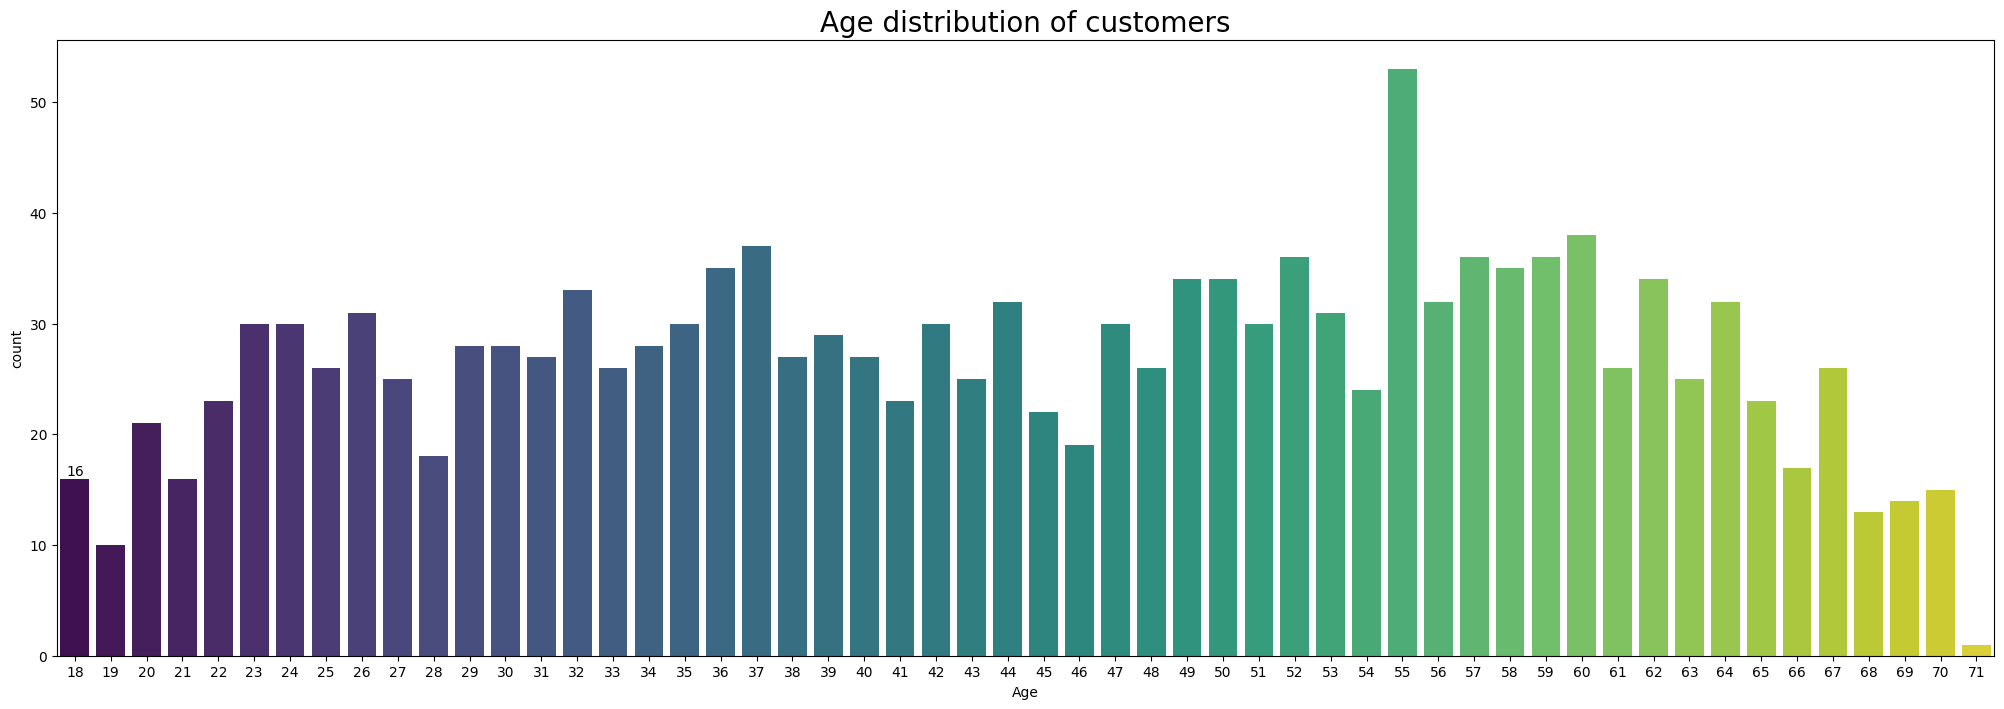

In [74]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['pink', 'skyblue']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()


plt.rcParams['figure.figsize'] = (25, 8)
datag = sns.countplot(x=data['Age'], palette = 'viridis')
datag.bar_label(datag.containers[0])
plt.title('Age distribution of customers', fontsize = 20)
plt.show()

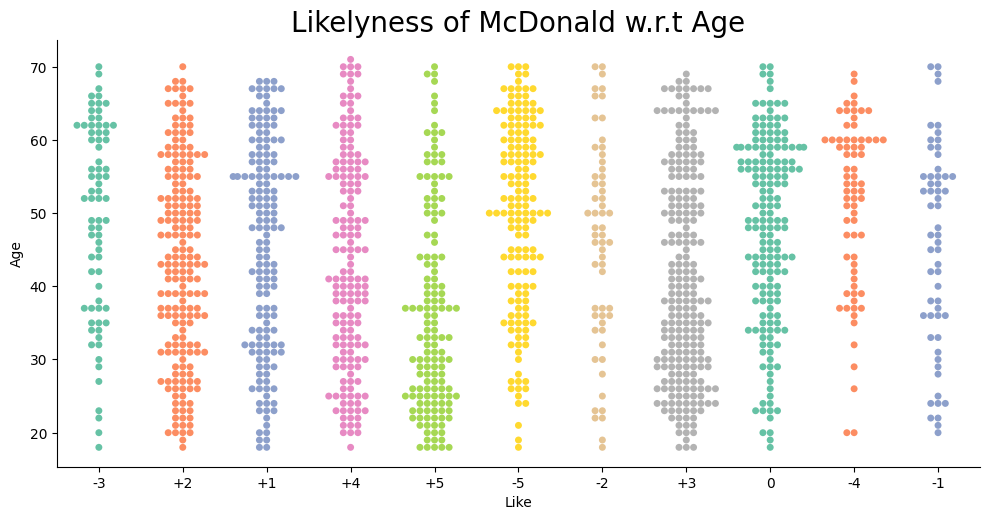

In [75]:
data['Like'] = data['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

# plotting the results
sns.catplot(data=data, x="Like", y="Age", orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age', fontsize=20)
plt.show()

In [76]:
from yellowbrick.cluster import KElbowVisualizer

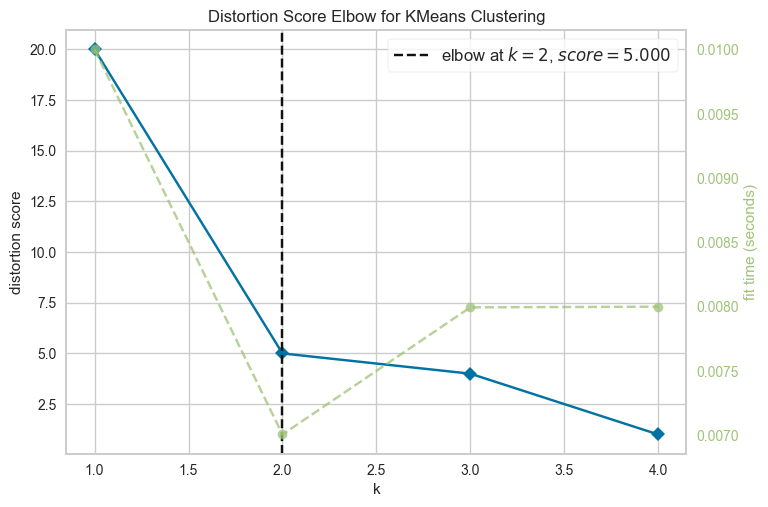

<Figure size 1400x700 with 0 Axes>

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [79]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd

# Example DataFrame with encoded features
# Ensure this DataFrame has more rows than the maximum number of clusters you want to test
df_encoded = pd.DataFrame({
    'feature1': [1.0, 2.0, 3.0, 4.0, 5.0],
    'feature2': [2.0, 3.0, 4.0, 5.0, 6.0]
})

# Ensure the range of k is within the number of samples
max_clusters = min(df_encoded.shape[0], 12)  # Adjust max_clusters based on number of samples

# Initialize KMeans model
model = KMeans()

# Initialize KElbowVisualizer with the model and adjusted range of k values
visualizer = KElbowVisualizer(model, k=(1, max_clusters))

# Fit the visualizer
visualizer.fit(df_encoded)

# Show the plot
plt.figure(figsize=(14, 7))
visualizer.show()


In [80]:
from statsmodels.graphics.mosaicplot import mosaic

c:\Users\Anjali\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Anjali\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Anjali\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Anjali\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds

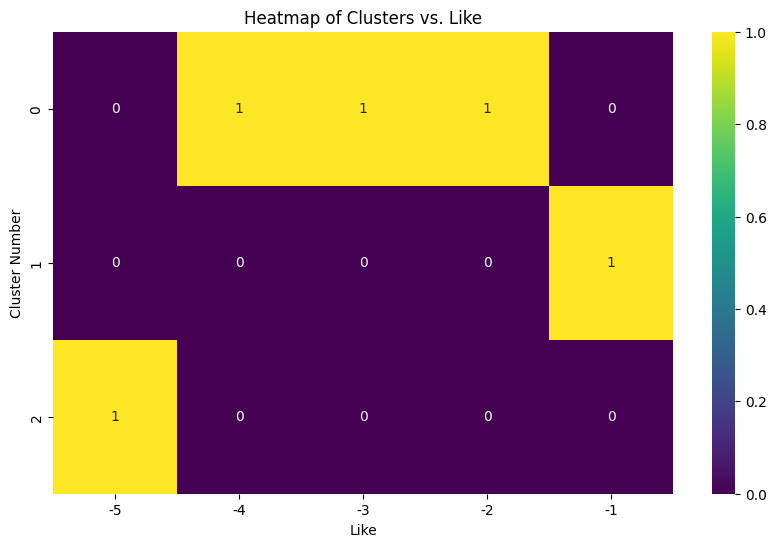

Like         -5  -4  -3  -2  -1
cluster_num                    
0             0   1   1   1   0
1             0   0   0   0   1
2             1   0   0   0   0


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame with encoded features (replace with your actual data)
data = pd.DataFrame({
    'feature1': [1.0, 2.0, 3.0, 4.0, 5.0],
    'feature2': [2.0, 3.0, 4.0, 5.0, 6.0],
    'Like': ['-5', '-4', '-3', '-2', '-1']  # Example categories, replace as needed
})

# Define the number of clusters
n_clusters = 3

# Initialize and fit KMeans
km = KMeans(n_clusters=n_clusters, random_state=0)
km.fit(data[['feature1', 'feature2']])  # Fit on features

# Add cluster labels to your DataFrame
data['cluster_num'] = km.labels_

# Create crosstab of cluster numbers vs. 'Like'
crosstab = pd.crosstab(data['cluster_num'], data['Like'])

# Ensure columns in crosstab are in the expected order (modify as needed)
crosstab = crosstab[['-5', '-4', '-3', '-2', '-1']]

# Set figure size for the plot
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(crosstab, annot=True, cmap='viridis', fmt='d')

# Add labels and title
plt.xlabel('Like')
plt.ylabel('Cluster Number')
plt.title('Heatmap of Clusters vs. Like')

# Show plot
plt.show()

# Display crosstab DataFrame
print(crosstab)


Gender       Female  Male
cluster_num              
0                 0     3
1                 4     0
2                 1     2


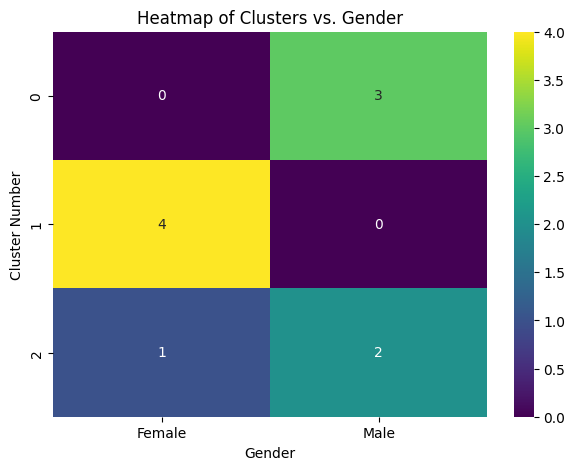

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame with cluster numbers and gender (replace with your actual data)
data = pd.DataFrame({
    'cluster_num': [0, 1, 1, 0, 2, 2, 1, 0, 2, 1],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female']
})

# Create crosstab of cluster numbers vs. Gender
crosstab_gender = pd.crosstab(data['cluster_num'], data['Gender'])

# Display the crosstab DataFrame
print(crosstab_gender)

# Set figure size for the plot
plt.rcParams['figure.figsize'] = (7, 5)

# Create heatmap
sns.heatmap(crosstab_gender, annot=True, cmap='viridis', fmt='d')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Cluster Number')
plt.title('Heatmap of Clusters vs. Gender')

# Show plot
plt.show()


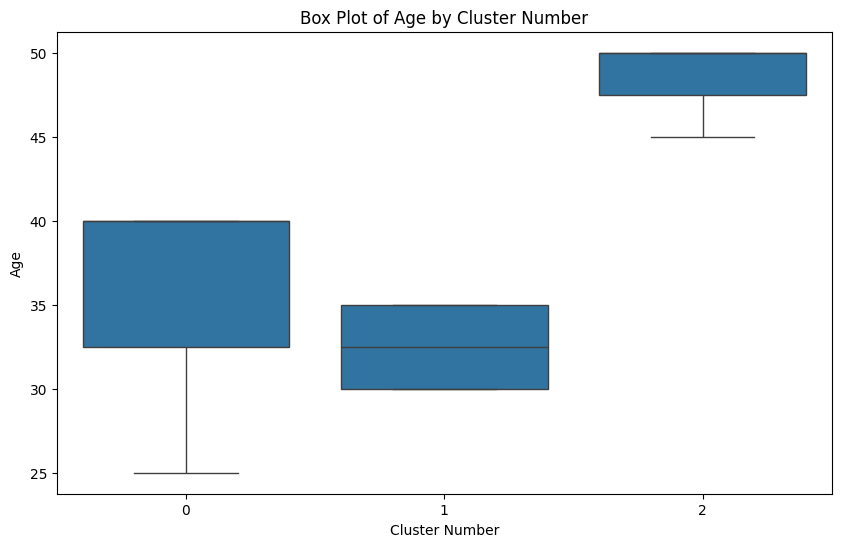

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (replace with your actual data)
data = pd.DataFrame({
    'cluster_num': [0, 1, 1, 0, 2, 2, 1, 0, 2, 1],
    'Age': [25, 30, 35, 40, 45, 50, 30, 40, 50, 35]
})

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="cluster_num", y="Age", data=data)

# Add labels and title
plt.xlabel('Cluster Number')
plt.ylabel('Age')
plt.title('Box Plot of Age by Cluster Number')

# Show plot
plt.show()


In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example DataFrame (replace with your actual data)
data = pd.DataFrame({
    'cluster_num': [0, 1, 1, 0, 2, 2, 1, 0, 2, 1],
    'VisitFrequency': ['Weekly', 'Monthly', 'Weekly', 'Daily', 'Monthly', 'Daily', 'Weekly', 'Monthly', 'Daily', 'Weekly']
})

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform 'VisitFrequency'
data['VisitFrequency'] = label_encoder.fit_transform(data['VisitFrequency'])

# Group by 'cluster_num' and calculate the mean 'VisitFrequency'
visit = data.groupby('cluster_num')['VisitFrequency'].mean()

# Convert Series to DataFrame
visit = visit.to_frame().reset_index()

# Display the resulting DataFrame
print(visit)


   cluster_num  VisitFrequency
0            0        1.000000
1            1        1.750000
2            2        0.333333


In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example DataFrame (replace with your actual data)
data = pd.DataFrame({
    'cluster_num': [0, 1, 1, 0, 2, 2, 1, 0, 2, 1],
    'Like': ['-5', '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4']
})

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform 'Like'
data['Like'] = label_encoder.fit_transform(data['Like'])

# Group by 'cluster_num' and calculate the mean 'Like'
Like = data.groupby('cluster_num')['Like'].mean()

# Convert Series to DataFrame
Like = Like.to_frame().reset_index()

# Display the resulting DataFrame
print(Like)


   cluster_num      Like
0            0  4.666667
1            1  4.000000
2            2  5.000000


In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example DataFrame (replace with your actual data)
data = pd.DataFrame({
    'cluster_num': [0, 1, 1, 0, 2, 2, 1, 0, 2, 1],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female']
})

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform 'Gender'
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Group by 'cluster_num' and calculate the mean 'Gender'
Gender = data.groupby('cluster_num')['Gender'].mean()

# Convert Series to DataFrame
Gender = Gender.to_frame().reset_index()

# Display the resulting DataFrame
print(Gender)


   cluster_num    Gender
0            0  1.000000
1            1  0.000000
2            2  0.333333


In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example DataFrames (replace with your actual data)
Gender = pd.DataFrame({
    'cluster_num': [0, 1, 2],
    'Gender': [0.5, 0.0, 1.0]  # Example encoded values
})

Like = pd.DataFrame({
    'cluster_num': [0, 1, 2],
    'Like': [1.5, 2.0, 0.5]  # Example mean values
})

visit = pd.DataFrame({
    'cluster_num': [0, 1, 2],
    'VisitFrequency': [3.0, 4.5, 2.5]  # Example mean values
})

# Merge DataFrames
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')

# Display the resulting DataFrame
print(segment)


   cluster_num  Gender  Like  VisitFrequency
0            0     0.5   1.5             3.0
1            1     0.0   2.0             4.5
2            2     1.0   0.5             2.5


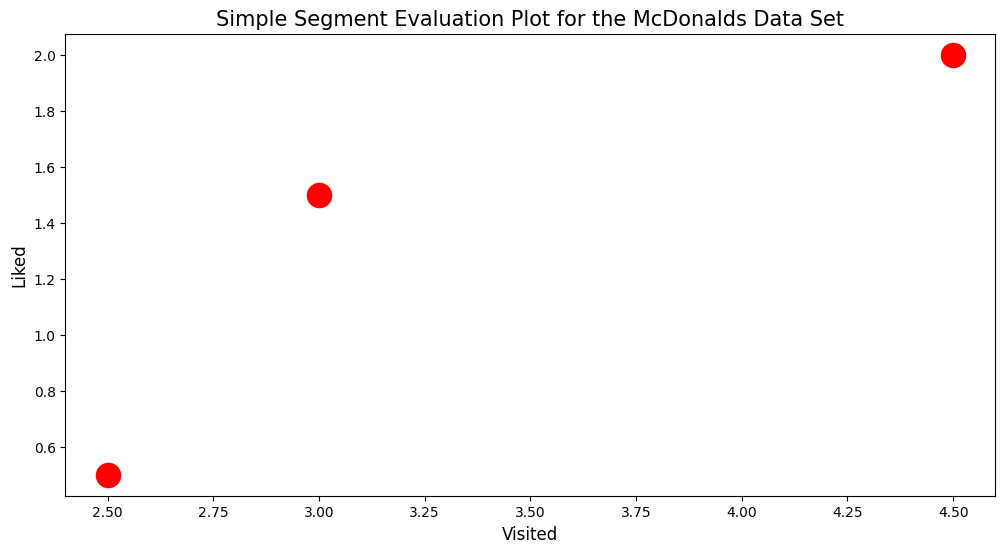

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example DataFrame (replace with your actual data)
segment = pd.DataFrame({
    'VisitFrequency': [3.0, 4.5, 2.5],
    'Like': [1.5, 2.0, 0.5]
})

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x="VisitFrequency", y="Like", data=segment, s=400, color="r")
plt.title("Simple Segment Evaluation Plot for the McDonalds Data Set", fontsize=15)
plt.xlabel("Visited", fontsize=12)
plt.ylabel("Liked", fontsize=12)
plt.show()
